# Graduation Rotational Internship Program - Task-4

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the iris data set
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Checking for null values in the datasets
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [3]:
# As all the categories aare equally classified, so we do not need to apply class imbalance techniques. 
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Describing the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Pre-processing
**Converting all the datatypes into nummeric values using label encoding.**

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

factcols = df.select_dtypes(include='object')
df[factcols.columns] = df[factcols.columns].apply(le.fit_transform)

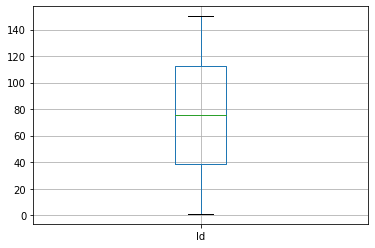

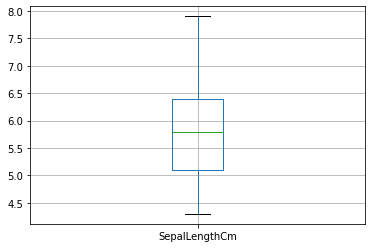

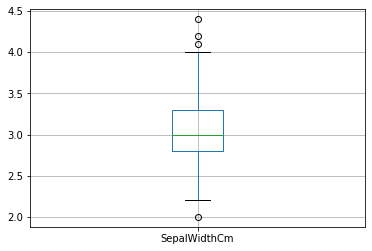

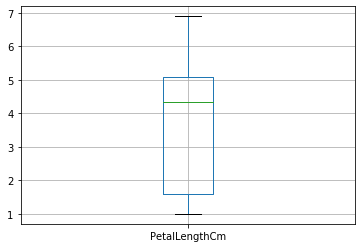

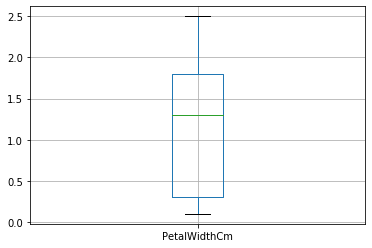

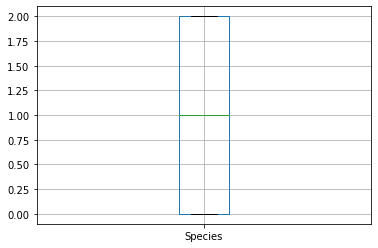

In [7]:
# Checking for Outliers in the dataset.
for i in df.columns:
    plt.figure()
    df.boxplot([i])

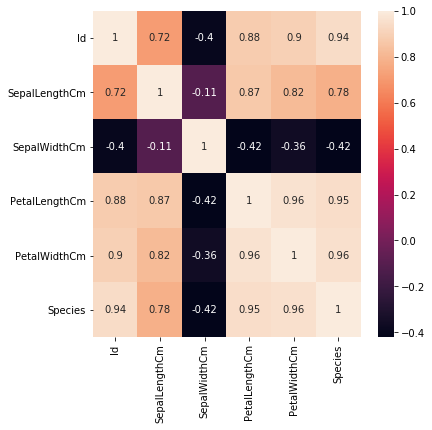

In [8]:
# Heat Map for checking the correlation between the columns
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)

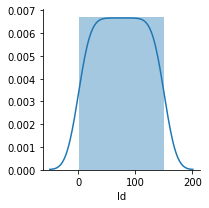

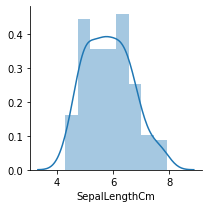

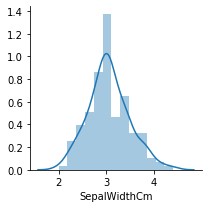

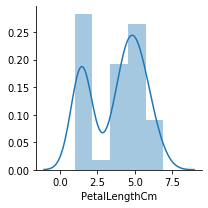

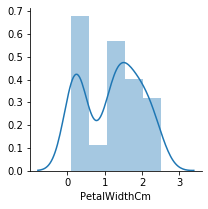

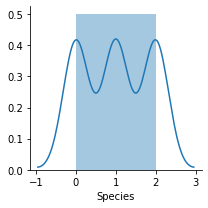

In [9]:
# Checking the distribution of the data, whether it is skewed or not
for i in df.columns:
    g = sns.FacetGrid(data=df,legend_out=False)
    print(g.map(sns.distplot,i))

## Splitting the data into training and testing

In [10]:
# Shuffling the data to avoid biasing in the training
df = df.sample(frac=1)

In [11]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [12]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [14]:
X_train.shape

(120, 4)

In [15]:
X_test.shape

(30, 4)

In [16]:
y_train.shape

(120,)

In [17]:
y_test.shape

(30,)

## Building the Model

In [18]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
# Predictions on testing data
y_pred = model_tree.predict(X_test)
y_pred

array([1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2,
       1, 2, 1, 2, 0, 1, 1, 1])

In [20]:
# Visualising using Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confuse_mtx = confusion_matrix(y_pred, y_test)
print(confuse_mtx)

[[ 4  0  0]
 [ 0 12  3]
 [ 0  1 10]]


In [21]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.92      0.80      0.86        15
           2       0.77      0.91      0.83        11

    accuracy                           0.87        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.88      0.87      0.87        30



**So we have a pretty good accuracy and confusion matrix.**

In [22]:
# Checking the accuracy using cross validation.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_tree, X, y, cv=6)
scores

array([0.88, 0.88, 1.  , 0.96, 0.96, 0.96])

In [23]:
# Calculating accuracy
scores.mean()

0.94

In [24]:
from sklearn import tree

text_representation = tree.export_text(model_tree)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.70
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.70
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_0 <= 6.15
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.15
|   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.70
|   |   |   |--- class: 2



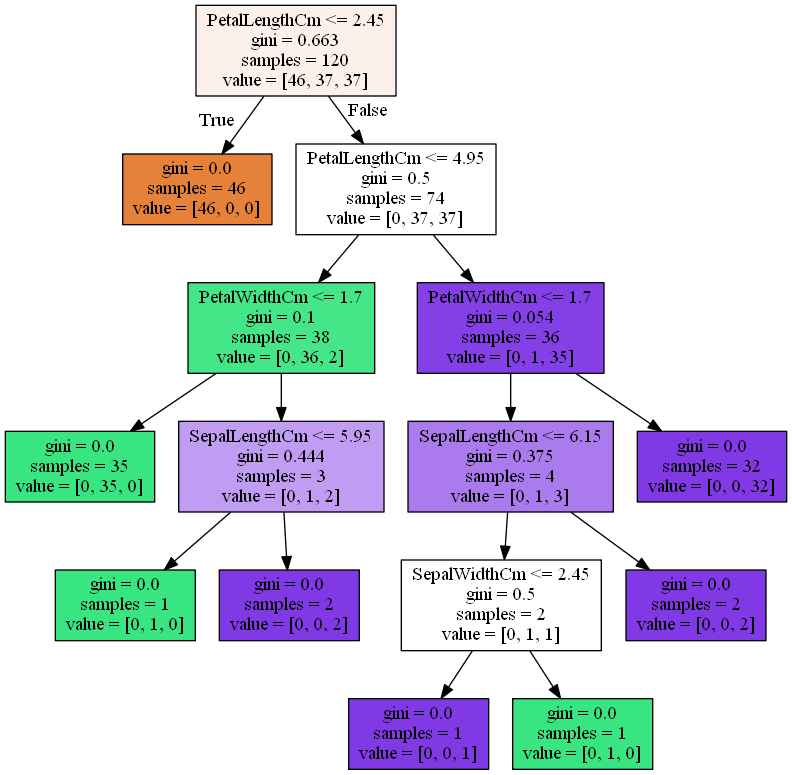

<Figure size 432x288 with 0 Axes>

In [25]:
import graphviz
from IPython.display import Image
from io import StringIO
import pydotplus
import pydot
from sklearn.tree import export_graphviz

iris_x_train_names = X_train.columns
dot_data = StringIO()
fig = plt.figure()
export_graphviz(model_tree, out_file = dot_data,filled = True, feature_names = iris_x_train_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())